In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as matdates
from datetime import datetime as dt
from datetime import date, timedelta
import yfinance as yf
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
stock_list = { 'XLB' : 'Material : XLB',
              'XLE' : 'Energy : XLE',
              'XLF' : 'Financial : XLF',
              'XLI' : 'Industrial : XLI',
              'XLP' : 'Consumer_Staples : XLP',
              'XLV' : 'Health_Care : XLV',
              'XLK' : 'Technology : XLK',
              'XLU' : 'Utilities : XLU',
              'XLRE' : 'Real_Estate : XLRE',
              'XLC' : 'Communication_Services : XLC',
              'XLY' : 'Consumer_Discretionary : XLY', 
              '^GSPC' : 'S&P500',
              '^IXIC' : 'Nasdaq'} 

In [4]:
print('set start year : ')
start_year = int(input())
print('set start month : ')
start_month = int(input())
start = dt(start_year,start_month,1)

set start year : 


 2022


set start month : 


 6


In [5]:
def to_index(x):
    for i in range(1,len(x)):
        x.iloc[i] = (x.iloc[i]/x.iloc[0])*100
    x.iloc[0] = 100
def get_return(x): 
    global stock_return
    rate_of_return = round((x.iloc[-1]-100),2)
    stock_return.append(rate_of_return)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


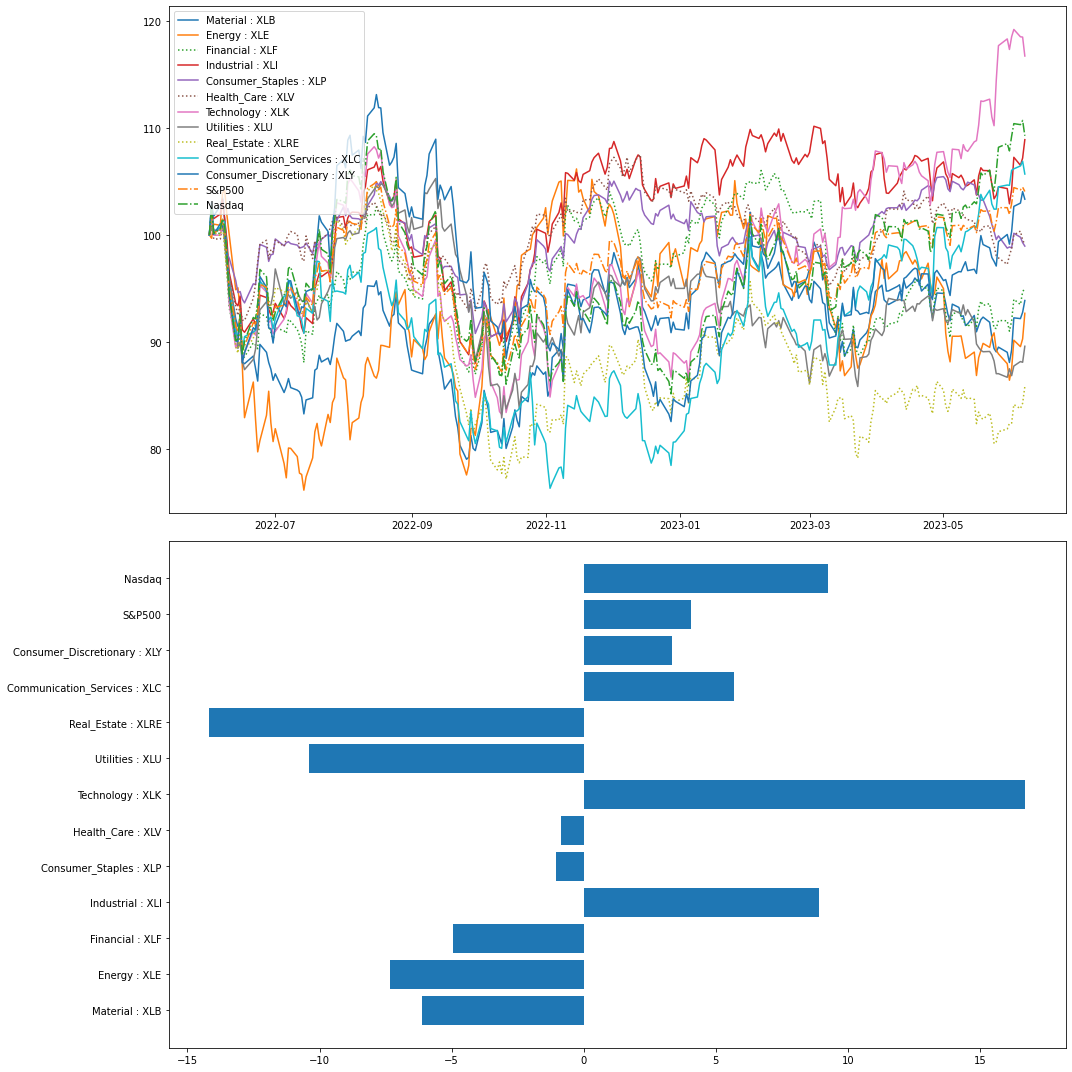

In [6]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
cnt = 0 
stock_return = []
stock_name = []

for code, name in stock_list.items():
    code = yf.download(code, start)['Close']
    to_index(code)
    get_return(code)
    cnt += 1 
    stock_name.append(name)
    if cnt<12:
        if cnt%3!=0:
            ax.plot(code,label=name)
        else:
            ax.plot(code,linestyle=':',label=name)
    else:
        ax.plot(code,linestyle='-.',label=name)
    if cnt == len(stock_list):
        ax2.barh(stock_name,stock_return)
ax.legend(loc=2)
fig.tight_layout()
plt.show() 

In [7]:
momentum_period = [4,12,24,48]
momentum_df = pd.DataFrame({'1month' : [],
                            '3month' : [],
                            '6month' : [],
                            '12month' : []})
end = dt.now()

for i in momentum_period:
    start = end - timedelta(weeks=i)
    stock_return = []
    for code,name in stock_list.items():
        code = yf.download(code, start)['Close']
        to_index(code)
        get_return(code)
    momentum_df[str(i//4)+'month'] = stock_return
momentum_df.index = stock_name

weight = [12,4,2,1]
score = 0
for i in range(momentum_df.shape[1]):
    score += momentum_df.iloc[:,i] * int(weight[i])
momentum_df['momentum_score'] = score

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [8]:
print(momentum_df.to_markdown())

|                              |   1month |   3month |   6month |   12month |   momentum_score |
|:-----------------------------|---------:|---------:|---------:|----------:|-----------------:|
| Material : XLB               |     2.37 |     5.88 |     1.82 |      9.49 |            65.09 |
| Energy : XLE                 |     4.6  |     6.7  |    -5.66 |     15.76 |            86.44 |
| Financial : XLF              |     3.98 |     7.07 |    -2.3  |      3.4  |            74.84 |
| Industrial : XLI             |     4.07 |     6.02 |     4.17 |     16.59 |            97.85 |
| Consumer_Staples : XLP       |    -5.69 |     0.86 |    -3.26 |     -0.23 |           -71.59 |
| Health_Care : XLV            |    -2.27 |     2.65 |    -5.08 |     -1.19 |           -27.99 |
| Technology : XLK             |     8.26 |    13.91 |    31.16 |     22.99 |           240.07 |
| Utilities : XLU              |    -3.68 |    -0.72 |    -6.23 |     -4.77 |           -64.27 |
| Real_Estate : XLRE          